In [8]:
# importing and defining relevant directories
import sys
import os
# pyseqlab root directory
pyseqlab_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# print("pyseqlab cloned dir:", pyseqlab_dir)
# inserting the pyseqlab directory to python's system path 
# if pyseqlab is already installed this could be commented out
sys.path.insert(0, pyseqlab_dir)
# current directory (tutorials)
test_dir = os.path.join(pyseqlab_dir, 'tests')
# print("test_dir:", test_dir)
dataset_dir = os.path.join(test_dir, 'datasets', 'conll2000')
# to use for customizing the display/format of the cells
from IPython.core.display import HTML
with open(os.path.join(test_dir, 'pseqlab_base.css')) as f:
    css = "".join(f.readlines())
HTML(css)

# 1. Continuous features testing

This notebook tests building models using sequences that include only continuous features. The sequences are generated using  <code class="pseq_class">SeqGenerator</code> class. These sequences intrinsically include a pattern between the features and the labels generated. The cell below will show the structure of such generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2']
X sequence:
 {1: {'f_1': '58.314869953785156', 'f_3': '96.6581737262256', 'f_4': '69.11907607378662', 'f_2': '63.570523332256045', 'f_0': '91.42524717753598'}, 2: {'f_1': '42.063933985659965', 'f_3': '65.03093564277171', 'f_4': '46.67577709728083', 'f_2': '85.77909453590385', 'f_0': '96.14436373859563'}, 3: {'f_1': '53.267674716231596', 'f_3': '77.9547644206696', 'f_4': '92.65032191400174', 'f_2': '57.48384367271811', 'f_0': '116.16441805335658'}, 4: {'f_1': '68.29343575591966', 'f_3': '92.20558767665987', 'f_4': '61.35149715896136', 'f_2': '98.73138802279048', 'f_0': '84.58992006346654'}, 5: {'f_1': '175.71687319504613', 'f_3': '223.80146156692317', 'f_4': '187.77107385339292', 'f_2': '199.53064241952328', 'f_0': '209.76176935627524'}, 6: {'f_1': '188.3102894059799', 'f_3': '217.93344723042767', 'f_4': '206.95682230255625', 'f_2': '198.73129811912438', 'f_0': '246.22751573947784'}, 7: {'f_1': '177.47941509179864

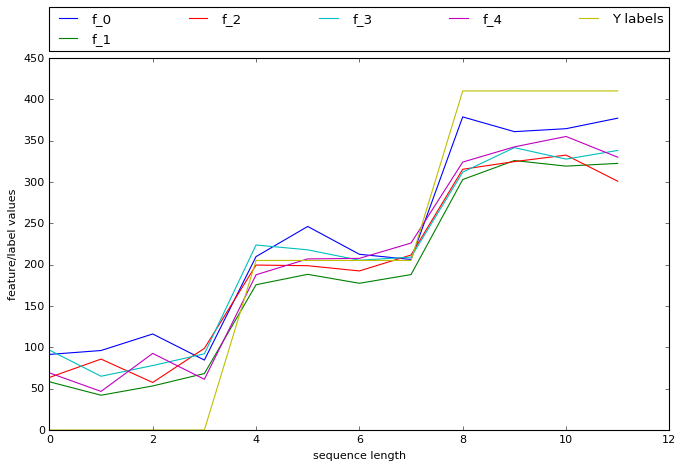

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from experiment_cont_features import *

def plot_seq_features(seq):
    features_mean = []
    num_features = len(seq.X[1].keys())
    for f in range(num_features):
        f_vals = []
        for i in range(seq.T):
            f_val = float(seq.X[i+1]["f_{}".format(f)])
            f_vals.append(f_val)
        features_mean.append(np.mean(f_vals))
        plt.plot(f_vals, label='f_{}'.format(f))
    # plot the labels -- seq.flat_y attribute is the list of labels of Y
    overall_mean = np.mean(features_mean)
    plt.plot([int(elem)*overall_mean for elem in seq.flat_y], label='Y labels')
    plt.xlabel('sequence length')
    plt.ylabel('feature/label values')
    plt.legend(loc='upper left')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=5, mode="expand", borderaxespad=0.)

# generate sequences with length = 10  with number of labels = 3 and continuous features tracks = 5
seq_len = 10
num_labels = 3
num_contfeatures_tracks = 5
categfeatures_percentage = 0
# initialize sequence generator
seq_generator = SeqGenerator(seq_len, num_labels, num_contfeatures_tracks, "rescaling", categfeatures_percentage)
# generate 2 sequences
num_seqs = 2
seqs = seq_generator.generate_seqs(num_seqs)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

As it can be seen from the plot above, although the features include random values, they are tied to a range for every label. For example, in the above figure we have <span style="color:red">3</span> labels <span style="color:red">0, 1, 2</span> where each label is associated to a range of values for each of the <span style="color:rgb(34,139,34)
">5</span> features we have. In other words, observations/feature values increase monotonically for every new label assigned to. The labels in the figure were scaled by the mean value of the features for visualization purposes.
<br/>
Below, we generate again another sequences where we increase the number of labels to <span style="color:red">5</span> to further demonstrate the structure of the generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4']
X sequence:
 {1: {'f_6': '131.12383867867183', 'f_1': '64.79114865149523', 'f_3': '66.67247815628612', 'f_4': '120.96645061244875', 'f_5': '117.21846852401663', 'f_7': '79.97083043857336', 'f_9': '48.660253140702', 'f_8': '92.95679264831377', 'f_2': '70.3831186565458', 'f_0': '120.53638397299284'}, 2: {'f_6': '91.1203039597295', 'f_1': '58.459238734866304', 'f_3': '49.91373258493473', 'f_4': '82.35828447810506', 'f_5': '110.19429253681618', 'f_7': '80.85711234982813', 'f_9': '37.974396353472315', 'f_8': '97.67247860288724', 'f_2': '44.998442247493735', 'f_0': '119.04319445995667'}, 3: {'f_6': '108.1230530190914', 'f_1': '32.78270790970697', 'f_3': '18.64696074485192', 'f_4': '123.21695787725433', 'f_5': '92.83007598770007', 'f_7': '63.357086252766514', 'f_9': '16.89153854281283', 'f_8': '79.0926235752391', 'f_2': '75.06169972183942', 'f_0': '96.81432091889434'}, 4: {'f_6': 

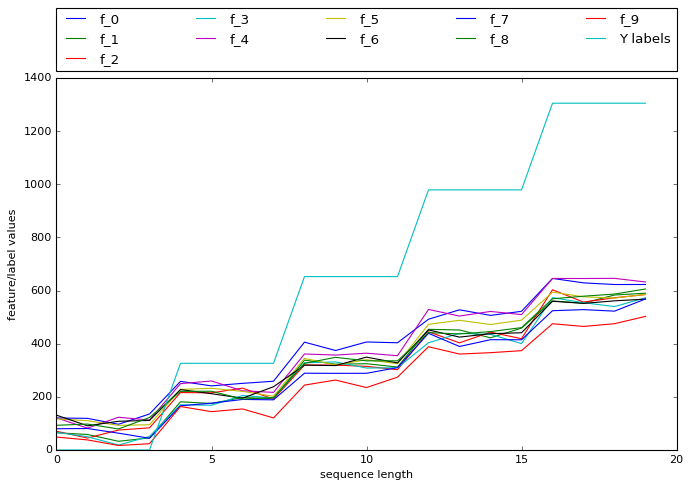

In [3]:
# generate sequences with length = 20, number of labels = 5 and continuous features = 10
# initialize sequence generator
seq_generator = SeqGenerator(20, 5, 10, "rescaling", 0)
# generate a sequence
seqs = seq_generator.generate_seqs(1)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

In the following cells, we test the different training methods (1) gradient-based and (2) perceptron/search-based methods
on 5 generated sequences. The generated sequences are of <code class="pseq_code">length 100</code>, with <code class="pseq_code">100 continuous features</code> and <code class="pseq_code">3 labels</code> to predict (check the generated <code class="pseq_class">seq_generator</code> instance inside the <code class="pseq_code">experiment_cont_features.py module</code> in the <code class="pseq_code">tests</code> folder).

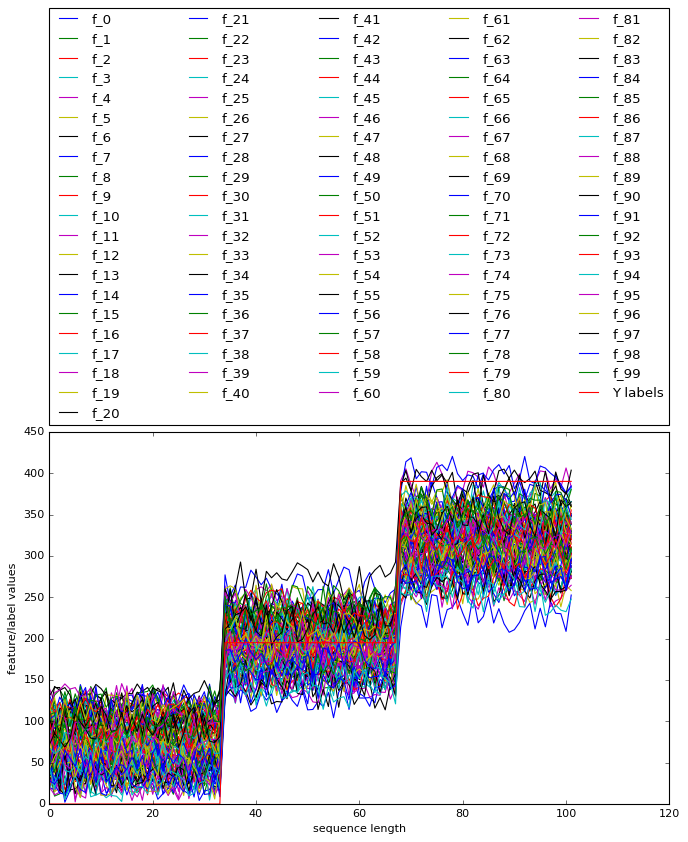

In [4]:
import experiment_cont_features
seqs = experiment_cont_features.seq_generator.generate_seqs(1)
seq = seqs[0]
#print(seq)
plot_seq_features(seq)

# 2. Testing gradient-based training methods

dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
constructing model -- processed seqs:  1
constructing model -- processed seqs:  2
constructing model -- processed seqs:  3
constructing model -- processed seqs:  4
constructing model -- processed seqs:  5
identifying model active features -- processed seqs:  1
identifying model active features -- processed seqs:  2
identifying model active features -- processed seqs:  3
identifying model active features -- processed seqs:  4
identifying model active features -- processed seqs:  5
evaluating method: SGA, with l2 regularization: 0.01
training using optimization options:
{'regularization_type': 'l2', 'regularization_value': 0.01, 'method': 'SGA', 'num_epochs': 10}
num seqs left: 4
num seqs left: 3
num seqs left: 2
num seqs left: 1
num seqs left: 0
reldiff = 1.0
num se

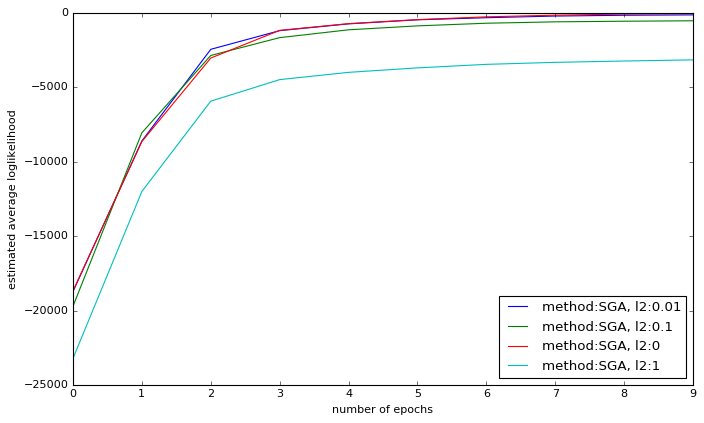

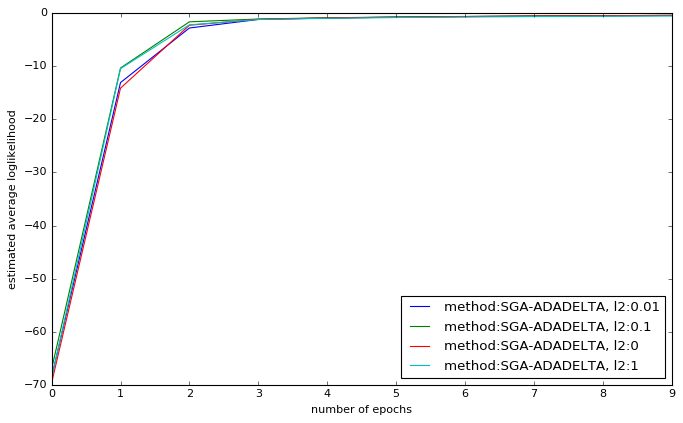

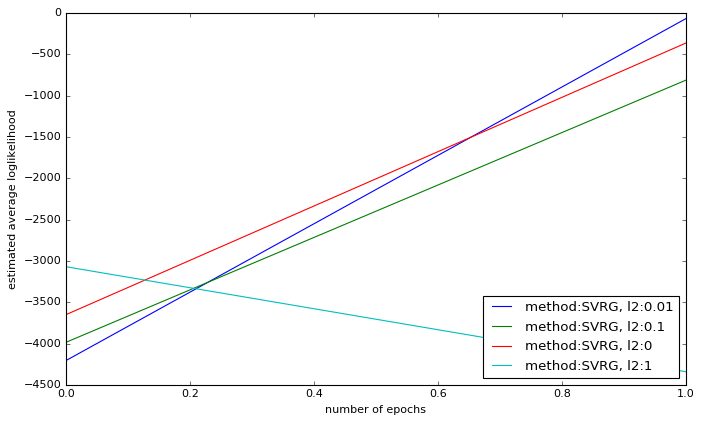

In [6]:
# case of HOCRFAD models
workflow, crf_model, data_split = build_model('HOCRFAD', template_config_2, 5)

# train models using SGA, SGA-ADADELTA, and SVRG methods
optimization_options = {"method" : "",
                        "regularization_type": "l2",
                        "regularization_value":0,
                       }
methods = ('SGA', 'SGA-ADADELTA', 'SVRG')
trained_models_dir = {}
train_seqs_id = data_split[0]['train']


for i, method in enumerate(methods):
    plt.figure(i)
    optimization_options['method'] = method
    if(method in {'SGA', 'SGA-ADADELTA'}):
        optimization_options['num_epochs'] = 10
    elif(method == 'SVRG'):
        optimization_options['num_epochs'] = 2
    else:
        del optimization_options['num_epochs']

    for c in (0.01, 0.1, 0, 1):
        print("evaluating method: {}, with l2 regularization: {}".format(method, c))
        optimization_options['regularization_value'] = c
        print("training using optimization options:")
        print(optimization_options)
        # make sure we are initializing the weights to be 0
        crf_model.weights.fill(0)
        model_dir = workflow.train_model(train_seqs_id, crf_model, optimization_options)
        print("*"*50)
        avg_ll = ReaderWriter.read_data(os.path.join(model_dir, 'avg_loglikelihood_training'))
        plt.plot(avg_ll[1:], label="method:{}, {}:{}".format(optimization_options['method'], 
                                                         optimization_options['regularization_type'],
                                                         optimization_options['regularization_value']))
        trained_models_dir[method] = model_dir
    plt.legend(loc='lower right')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average loglikelihood')


Another setup in the next cell will be using 200 generated sequences <code class="pseq_code">of length 20</code>, with <code class="pseq_code">10 continuous features</code> and <code class="pseq_code">3 labels</code> to predict.

dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
dumping globalfeatures -- processed seqs:  6
dumping globalfeatures -- processed seqs:  7
dumping globalfeatures -- processed seqs:  8
dumping globalfeatures -- processed seqs:  9
dumping globalfeatures -- processed seqs:  10
dumping globalfeatures -- processed seqs:  11
dumping globalfeatures -- processed seqs:  12
dumping globalfeatures -- processed seqs:  13
dumping globalfeatures -- processed seqs:  14
dumping globalfeatures -- processed seqs:  15
dumping globalfeatures -- processed seqs:  16
dumping globalfeatures -- processed seqs:  17
dumping globalfeatures -- processed seqs:  18
dumping globalfeatures -- processed seqs:  19
dumping globalfeatures -- processed seqs:  20
dumping globalfeatures -- processed seqs:  21
dumping globalfeatures -- processed seqs:  

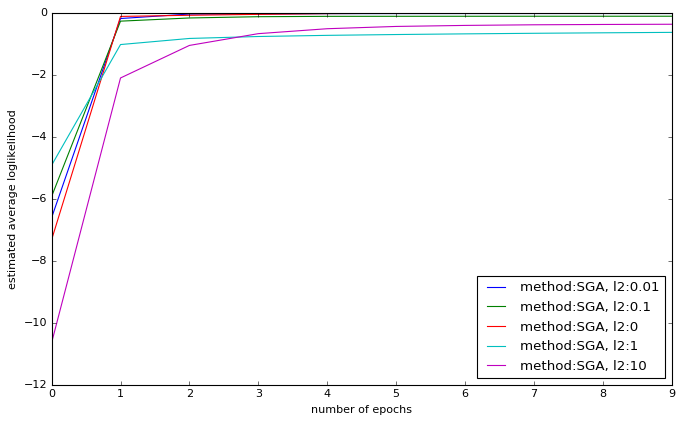

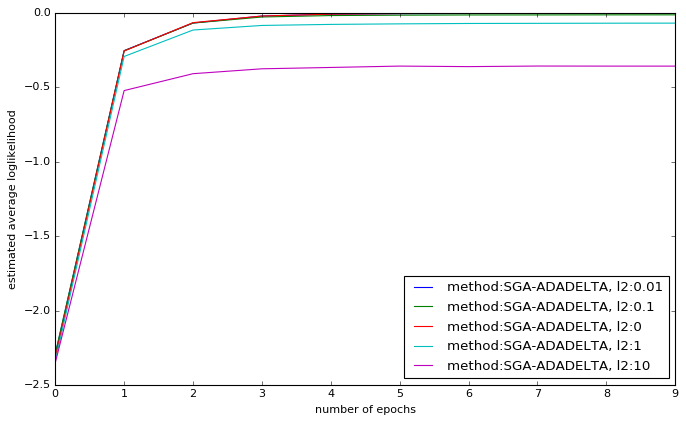

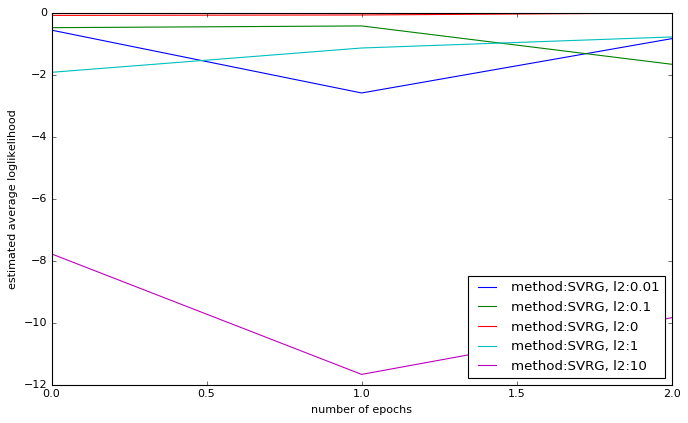

In [11]:
import experiment_cont_features
# re instantiate the seq_generator object in the experiment_cont_features module
experiment_cont_features.seq_generator = SeqGenerator(20, 3, 10, "rescaling", 0)

# case of HOCRFAD models
workflow, crf_model, data_split = build_model('HOCRFAD', template_config_2, 100)

# train models using SGA, SGA-ADADELTA, and SVRG methods
optimization_options = {"method" : "",
                        "regularization_type": "l2",
                        "regularization_value":0,
                       }
methods = ('SGA', 'SGA-ADADELTA', 'SVRG')
trained_models_dir = {}
train_seqs_id = data_split[0]['train']

counter = 1
for i, method in enumerate(methods):
    plt.figure(i)
    optimization_options['method'] = method
    if(method in {'SGA', 'SGA-ADADELTA'}):
        optimization_options['num_epochs'] = 10
    elif(method == 'SVRG'):
        optimization_options['num_epochs'] = 3
    else:
        del optimization_options['num_epochs']

    for c in (0.01, 0.1, 0, 1, 10):
        print("evaluating method: {}, with l2 regularization: {}".format(method, c))
        optimization_options['regularization_value'] = c
        print("training using optimization options:")
        print(optimization_options)
        # make sure we are initializing the weights to be 0
        crf_model.weights.fill(0)
        model_dir = workflow.train_model(train_seqs_id, crf_model, optimization_options)
        print("*"*50)
        avg_ll = ReaderWriter.read_data(os.path.join(model_dir, 'avg_loglikelihood_training'))
        plt.plot(avg_ll[1:], label="method:{}, {}:{}".format(optimization_options['method'], 
                                                         optimization_options['regularization_type'],
                                                         optimization_options['regularization_value']))
        trained_models_dir[method] = model_dir
        counter+=1
    plt.legend(loc='lower right')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average loglikelihood')

# 3. Testing perceptron-based training methods

evaluating method: COLLINS-PERCEPTRON, update_type: early, beam_size: 1
sequences left 5
in early update routine ...
sequences left 4
in early update routine ...
sequences left 3
in early update routine ...
sequences left 2
in early update routine ...
sequences left 1
in early update routine ...
reldiff = 1.0
average error : [0, 0.28290726817042605]
self._exitloop False
sequences left 5
in early update routine ...
sequences left 4
in early update routine ...
sequences left 3
in early update routine ...
sequences left 2
in early update routine ...
sequences left 1
in early update routine ...
reldiff = 0.844562713597637
average error : [0, 0.28290726817042605, 0.02383997992789793]
self._exitloop False
sequences left 5
in early update routine ...
sequences left 4
in early update routine ...
sequences left 3
in early update routine ...
sequences left 2
in early update routine ...
sequences left 1
in early update routine ...
reldiff = 0.044586178323514074
average error : [0, 0.2829072681704

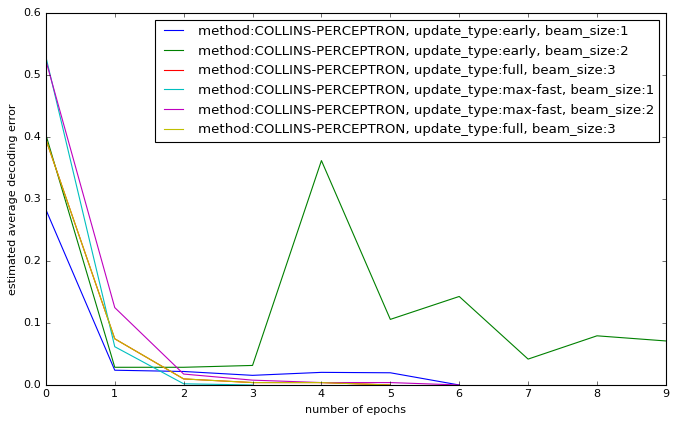

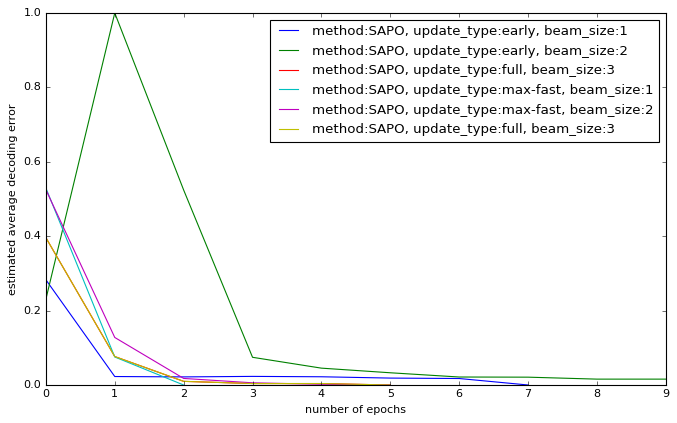

In [5]:
methods = ('COLLINS-PERCEPTRON', 'SAPO')
optimization_options = {'method': "",
                        'num_epochs':10,
                        'update_type':'max-fast',
                        'beam_size':-1,
                        'shuffle_seq':False
                        }

for i, method in enumerate(methods):
    plt.figure(i)
    optimization_options['method'] = method
    for update_type in ('early', 'max-fast'):
        optimization_options['update_type'] = update_type
        for beam_size in range(1, num_labels+1):
            optimization_options['beam_size'] = beam_size
            print("evaluating method: {}, update_type: {}, beam_size: {}".format(method, update_type, beam_size))
            # make sure we are initializing the weights to be 0
            crf_model.weights.fill(0)
            model_dir = workflow.train_model(train_seqs_id, crf_model, optimization_options)
            print("*"*50)
            # average decoding error -- this should generally be a decreasing graph 
            avg_dec_error = ReaderWriter.read_data(os.path.join(model_dir, 'avg_decodingerror_training'))
            if(beam_size != num_labels):
                upd_type = update_type
            else:
                upd_type = 'full'
            
            plt.plot(avg_dec_error[1:], label="method:{}, update_type:{}, beam_size:{}".format(method,
                                                                                              upd_type,
                                                                                              beam_size))
    plt.legend(loc='upper right')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average decoding error')
    
